In [1]:
import sys
import scipy.io as sio
import mat73
import pandas as pd
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import scipy
import random
import pickle
import os
import copy
import pandas as pd
from utils import compute_eer, compute_eer_2
import numpy as np
import sklearn.metrics
from my_conf_inter import evaluate_with_conf_int
import warnings
warnings.filterwarnings("ignore")


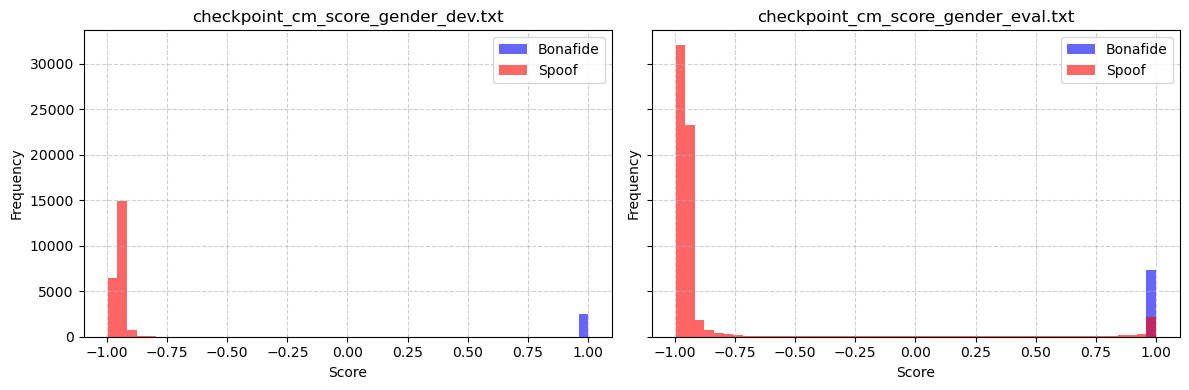

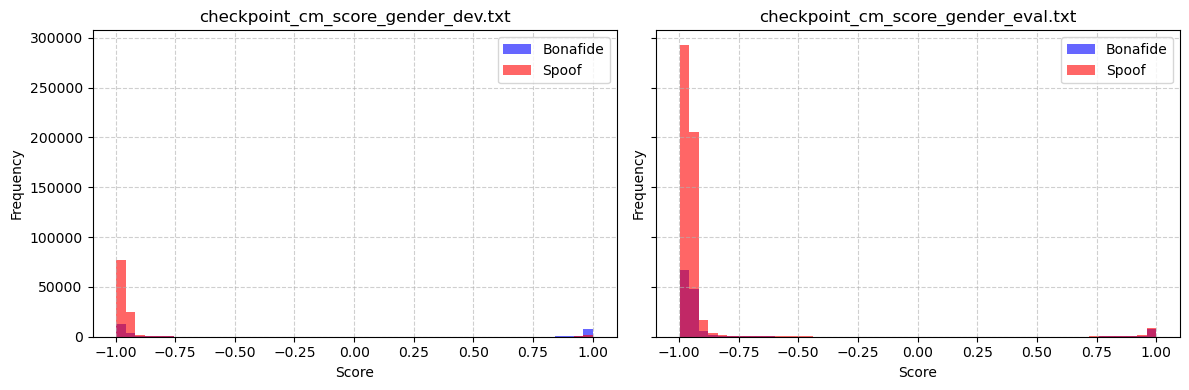

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_histogram_comparison(file_paths, gender="all"):
    num_files = len(file_paths)
    cols = 2  # Number of columns in the subplot grid
    rows = (num_files + cols - 1) // cols  # Calculate required rows
    unique_colors = plt.cm.get_cmap("tab10", 2)  # Use 2 colors for bonafide & spoof

    fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 4), sharex=True, sharey=True)
    axes = axes.flatten()  # Flatten the axes array for easy indexing

    for idx, file_path in enumerate(file_paths):
        df = pd.read_csv(file_path, delim_whitespace=True, header=None,
                         names=["file_id", "speakers", "attack_type", "label", "score", "gender"])

        mapping_labels = {"bonafide": 1, "spoof": -1}
        df["label"] = df["label"].map(mapping_labels)

        if gender == "male":
            df = df.loc[df["gender"] == "male"]
        elif gender == "female":
            df = df.loc[df["gender"] == "female"]

        # Separate bonafide and spoof scores
        bonafide_scores = df[df["label"] == 1]["score"]
        spoof_scores = df[df["label"] == -1]["score"]

        # Plot histograms
        axes[idx].hist(bonafide_scores, bins=50, alpha=0.6, color="blue", label="Bonafide")
        axes[idx].hist(spoof_scores, bins=50, alpha=0.6, color="red", label="Spoof")
        
        # Formatting
        axes[idx].set_title(file_path.split("/")[-1], fontsize=12)
        axes[idx].set_xlabel("Score", fontsize=10)
        axes[idx].set_ylabel("Frequency", fontsize=10)
        axes[idx].legend()
        axes[idx].grid(True, linestyle="--", alpha=0.6)

    # Hide any unused subplots
    for ax in axes[len(file_paths):]:
        ax.axis("off")

    plt.tight_layout()
    plt.show()

file_paths = [
    "./ASVspoof2019_bonafide/checkpoint_cm_score_gender_dev.txt",
    "./ASVspoof2019_bonafide/checkpoint_cm_score_gender_eval.txt"
]
plot_histogram_comparison(file_paths)

file_paths = [
    "./ASVspoof5_bonafide/checkpoint_cm_score_gender_dev.txt",
    "./ASVspoof5_bonafide/checkpoint_cm_score_gender_eval.txt"
]
plot_histogram_comparison(file_paths)

In [3]:
def compute_eer_from_text_file(file_path, threshold=None,gender = "all"):
    df = pd.read_csv(file_path, delim_whitespace=True, header=None, 
                 names=["file_id", "speakers", "attack_type", "label", "score", "gender"])

    mapping_labels = {"bonafide": 1, "spoof": -1}

    df.label = df.label.map(mapping_labels)
    
    if gender == "male":
        df = df.loc[df["gender"] == "male"]
    
    if gender ==  "female":
        df = df.loc[df["gender"] == "female"]
        

    pred, labels , eer , misclassifications , misclassification_rate = [], [], [], [], []
    if threshold is None:
        
        eer, threshold = compute_eer( y= df.label.values, y_score = df.score.values)
    else:
        pred = (df.score.values > threshold).astype(int)
        labels = df.label.values 
    
    #misscalssification rate
        misclassifications = (pred != labels).sum()  # Count mismatches
        misclassification_rate = misclassifications / len(df)  # Rate
    
    
    return eer, threshold , pred , labels , misclassifications , misclassification_rate


# Define the path to the text file
file_path = "./ASVspoof5_bonafide/checkpoint_cm_score_gender_dev.txt"

eer_dev, threshold_dev , _ , _ , _ , _ = compute_eer_from_text_file(file_path)
print(f"eer_dev: {eer_dev}, threshold_dev: {threshold_dev}")

eer_dev: 0.37981106784963947, threshold_dev: -0.9601827108875998


In [4]:
file_path = "./ASVspoof2019_bonafide/checkpoint_cm_score_gender_dev_bonafide.txt"

_, _ , pred , labels , misclassifications , misclassification_rate = compute_eer_from_text_file(file_path,threshold_dev)
print(f"eer_dev: {eer_dev}, threshold_dev: {threshold_dev}")

print(f"misclassifications: {misclassifications}")
print(f"misclassification_rate: {100*misclassification_rate}%")

eer_dev: 0.37981106784963947, threshold_dev: -0.9601827108875998
misclassifications: 1
misclassification_rate: 0.03924646781789639%


In [5]:
file_path = "./ASVspoof2019_bonafide/checkpoint_cm_score_gender_eval_bonafide.txt"

_, _ , pred , labels , misclassifications , misclassification_rate = compute_eer_from_text_file(file_path,threshold_dev)
print(f"eer_dev: {eer_dev}, threshold_dev: {threshold_dev}")

print(f"misclassifications: {misclassifications}")
print(f"misclassification_rate: {100*misclassification_rate}%")

eer_dev: 0.37981106784963947, threshold_dev: -0.9601827108875998
misclassifications: 8
misclassification_rate: 0.10876954452753229%


In [6]:
file_path = "./ASVspoof5_bonafide/checkpoint_cm_score_gender_dev_bonafide.txt"

_, _ , pred , labels , misclassifications , misclassification_rate = compute_eer_from_text_file(file_path,threshold_dev)
print(f"eer_dev: {eer_dev}, threshold_dev: {threshold_dev}")

print(f"misclassifications: {misclassifications}")
print(f"misclassification_rate: {100*misclassification_rate}%")

eer_dev: 0.37981106784963947, threshold_dev: -0.9601827108875998
misclassifications: 11923
misclassification_rate: 38.051318057062616%


In [7]:
file_path = "./ASVspoof5_bonafide/checkpoint_cm_score_gender_eval_bonafide.txt"

_, _ , pred , labels , misclassifications , misclassification_rate = compute_eer_from_text_file(file_path,threshold_dev)
print(f"eer_dev: {eer_dev}, threshold_dev: {threshold_dev}")

print(f"misclassifications: {misclassifications}")
print(f"misclassification_rate: {100*misclassification_rate}%")

eer_dev: 0.37981106784963947, threshold_dev: -0.9601827108875998
misclassifications: 63600
misclassification_rate: 45.85832948777111%


### Plotting:

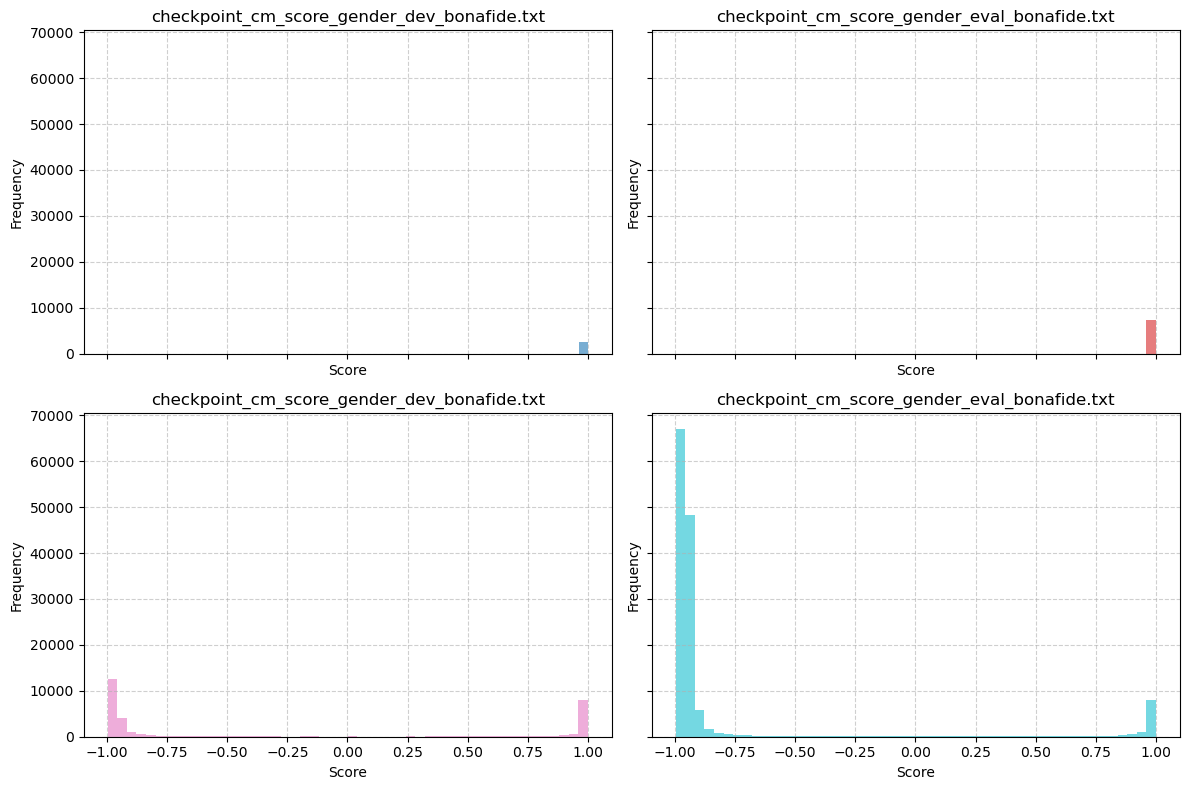

In [8]:
import pandas as pd
import matplotlib.pyplot as plt


import pandas as pd
import matplotlib.pyplot as plt

def plot_histogram_comparison(file_paths, gender="all"):
    num_files = len(file_paths)
    cols = 2  # Number of columns in the subplot grid
    rows = (num_files + cols - 1) // cols  # Calculate required rows
    unique_colors = plt.cm.get_cmap("tab10", num_files)

    fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 4), sharex=True, sharey=True)
    axes = axes.flatten()  # Flatten the axes array for easy indexing

    for idx, file_path in enumerate(file_paths):
        df = pd.read_csv(file_path, delim_whitespace=True, header=None,
                         names=["file_id", "speakers", "attack_type", "label", "score", "gender"])

        mapping_labels = {"bonafide": 1, "spoof": -1}
        df["label"] = df["label"].map(mapping_labels)

        if gender == "male":
            df = df.loc[df["gender"] == "male"]
        elif gender == "female":
            df = df.loc[df["gender"] == "female"]

        # Plot histogram in the appropriate subplot
        axes[idx].hist(df["score"], bins=50, alpha=0.6, color=unique_colors(idx))
        axes[idx].set_title(file_path.split("/")[-1], fontsize=12)
        axes[idx].set_xlabel("Score", fontsize=10)
        axes[idx].set_ylabel("Frequency", fontsize=10)
        axes[idx].grid(True, linestyle="--", alpha=0.6)

    # Hide any unused subplots
    for ax in axes[len(file_paths):]:
        ax.axis("off")

    plt.tight_layout()
    plt.show()



# Example usage
file_paths = [
    "./ASVspoof2019_bonafide/checkpoint_cm_score_gender_dev_bonafide.txt",
    "./ASVspoof2019_bonafide/checkpoint_cm_score_gender_eval_bonafide.txt",
    "./ASVspoof5_bonafide/checkpoint_cm_score_gender_dev_bonafide.txt",
    "./ASVspoof5_bonafide/checkpoint_cm_score_gender_eval_bonafide.txt"
]
plot_histogram_comparison(file_paths)




# With conf intervals:

In [9]:
# Percentage for the confidence interval
alpha = 5 

# Number of bootstrap samples to use (the run time will be proportional to this number). We set it to
# 50/alpha*100 to get enough samples in the tails.
num_bootstraps = int(50/alpha*100)

print(" Number of bootstraps: ", num_bootstraps)
print(" Alpha: ", alpha)

 Number of bootstraps:  1000
 Alpha:  5


In [10]:
def metric1(labels, scores):
    eer, threshold = compute_eer( y= labels, y_score = scores)
    return eer,threshold

def metric2(labels, scores):
    threshold_dev =  -0.9602207737928634
    pred = (scores > threshold_dev).astype(int)
    misclassifications = (pred != labels).sum()  # Count mismatches
    misclassification_rate = misclassifications / len(labels)  # Rate   
    
    return misclassifications , 100*misclassification_rate
    

def compute_eer_from_text_file(file_path, threshold=None,gender = "all"):
    df = pd.read_csv(file_path, delim_whitespace=True, header=None, 
                 names=["file_id", "speakers" ,"attack_type", "label", "score", "gender"])

    mapping_labels = {"bonafide": 1, "spoof": -1}

    df.label = df.label.map(mapping_labels)
    
    if gender == "male":
        df = df.loc[df["gender"] == "male"]
    
    if gender ==  "female":
        df = df.loc[df["gender"] == "female"]
    
    speakers = df["speakers"].values.astype(str)
    speakers_int = np.array([int(s[-4:]) for s in speakers])

    pred, labels , eer , res = [], [], [], []
    if threshold is None:
        speakers_int = None
        eer, threshold = evaluate_with_conf_int(samples =  df.score.values, metric = metric1, labels = df.label.values, 
                                              conditions = speakers_int, num_bootstraps=num_bootstraps, alpha=alpha)
    else:
        res = evaluate_with_conf_int(samples =  df.score.values, metric = metric2, labels = df.label.values, 
                                              conditions = speakers_int, num_bootstraps=num_bootstraps, alpha=alpha)
    
    
    return eer, threshold , pred , labels , res


# Define the path to the text file
file_path = "./ASVspoof5_bonafide/checkpoint_cm_score_gender_dev.txt"

eer_dev_male, threshold_dev_male , _ , _ , _  = compute_eer_from_text_file(file_path,gender = "male")
print(f"Male: eer_dev: {eer_dev_male}, threshold_dev: {threshold_dev_male}")

eer_dev_female, threshold_dev_female , _ , _ , _ = compute_eer_from_text_file(file_path,gender = "female")
print(f"Female: eer_dev: {eer_dev_female}, threshold_dev: {threshold_dev_female}")

eer_dev, threshold_dev , _ , _ , _ = compute_eer_from_text_file(file_path,gender = "all")
print(f"eer_dev: {eer_dev}, threshold_dev: {threshold_dev}")

 

Male: eer_dev: (0.3548427911684691, array(-0.95893478)), threshold_dev: [(0.34932989956068283, 0.36092975684564493), (-0.9592262757077441, -0.9586635205839698)]
Female: eer_dev: (0.40503638822695953, array(-0.96160097)), threshold_dev: [(0.3995781046791021, 0.41079099498635935), (-0.9619312660771352, -0.9612888895982202)]
eer_dev: (0.37981106784963947, array(-0.96018271)), threshold_dev: [(0.3760510022654671, 0.3841043130336366), (-0.9604069190923812, -0.9599605796892332)]


In [11]:
threshold_dev =  -0.9602207737928634

In [12]:
# Define the path to the text file
file_path = "./ASVspoof2019_bonafide/checkpoint_cm_score_gender_dev_bonafide.txt"

_, _ ,pred , labels , res = compute_eer_from_text_file(file_path,threshold_dev,gender = "male")
print(f"Male misclassifications: {res}")


_, _ , pred , labels , res = compute_eer_from_text_file(file_path,threshold_dev,gender = "female")
print(f"Female misclassifications: {res}")


_, _ , pred , labels , res = compute_eer_from_text_file(file_path,threshold_dev,gender = "all")
print(f"misclassifications: {res}")


Male misclassifications: ((0, 0.0), [(0.0, 0.0), (0.0, 0.0)])
Female misclassifications: ((1, 0.05952380952380953), [(0.0, 6.0), (0.0, 0.35714285714285715)])
misclassifications: ((1, 0.03924646781789639), [(0.0, 6.0), (0.0, 0.2414486921529175)])


In [13]:
# Define the path to the text file
file_path = "./ASVspoof2019_bonafide/checkpoint_cm_score_gender_eval_bonafide.txt"

_, _ ,pred , labels , res = compute_eer_from_text_file(file_path,threshold_dev,gender = "male")
print(f"Male misclassifications: {res}")


_, _ , pred , labels , res = compute_eer_from_text_file(file_path,threshold_dev,gender = "female")
print(f"Female misclassifications: {res}")


_, _ , pred , labels , res = compute_eer_from_text_file(file_path,threshold_dev,gender = "all")
print(f"misclassifications: {res}")

Male misclassifications: ((2, 0.08760402978537013), [(0.0, 8.0), (0.0, 0.3504161191414805)])
Female misclassifications: ((6, 0.11829652996845426), [(0.0, 17.0), (0.0, 0.3268843336962345)])
misclassifications: ((8, 0.10876954452753229), [(1.0, 20.0), (0.013292304626285561, 0.2664943846157587)])


In [ ]:
# Define the path to the text file
file_path = "./ASVspoof5_bonafide/checkpoint_cm_score_gender_dev_bonafide.txt"

_, _ ,pred , labels , res = compute_eer_from_text_file(file_path,threshold_dev,gender = "male")
print(f"Male misclassifications: {res}")


_, _ , pred , labels , res = compute_eer_from_text_file(file_path,threshold_dev,gender = "female")
print(f"Female misclassifications: {res}")


_, _ , pred , labels , res = compute_eer_from_text_file(file_path,threshold_dev,gender = "all")
print(f"misclassifications: {res}")

Male misclassifications: ((5507, 34.83899538179288), [(5010.75, 5974.275), (31.96062296049279, 37.40926809100685)])
Female misclassifications: ((6407, 41.26360533264636), [(5877.875, 6907.1), (38.540027527971866, 43.931713307861195)])


In [ ]:
# Define the path to the text file
file_path = "./ASVspoof5_bonafide/checkpoint_cm_score_gender_eval_bonafide.txt"

_, _ ,pred , labels , res = compute_eer_from_text_file(file_path,threshold_dev,gender = "male")
print(f"Male misclassifications: {res}")


_, _ , pred , labels , res = compute_eer_from_text_file(file_path,threshold_dev,gender = "female")
print(f"Female misclassifications: {res}")


_, _ , pred , labels , res = compute_eer_from_text_file(file_path,threshold_dev,gender = "all")
print(f"misclassifications: {res}")

Male misclassifications: ((29855, 43.61450359375913), [(28805.775, 30878.1), (42.24933911816862, 45.009800596302235)])
Female misclassifications: ((33660, 47.924141465914914), [(32637.85, 34698.125), (46.56221363549034, 49.29229949564517)])
misclassifications: ((63515, 45.79704083987079), [(62070.35, 64929.1), (44.84232793863702, 46.80717958287124)])
